# Floating-point operation count for tetrahedra

In [1]:
using CLOUD, Plots, JLD2, LaTeXStrings

In [2]:
reference_path = "../results/flops_reference/"

p_nm_ref = load_object(string(reference_path,"NodalMulti_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_nm_ref = load_object(string(reference_path,"NodalMulti_Tri_SkewSymmetricMapping/upwind/flops.jld2"))

p_mm_ref = load_object(string(reference_path,"ModalMulti_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_mm_ref = load_object(string(reference_path,"ModalMulti_Tri_SkewSymmetricMapping/upwind/flops.jld2"))

p_nt_ref = load_object(string(reference_path,"NodalTensor_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_nt_ref = load_object(string(reference_path,"NodalTensor_Tri_SkewSymmetricMapping/upwind/flops.jld2"))

p_mt_ref = load_object(string(reference_path,"ModalTensor_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_mt_ref = load_object(string(reference_path,"ModalTensor_Tri_SkewSymmetricMapping/upwind/flops.jld2"))

physical_path = "../results/flops_physical/"

p_nm_phys = load_object(string(physical_path,"NodalMulti_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_nm_phys = load_object(string(physical_path,"NodalMulti_Tri_SkewSymmetricMapping/upwind/flops.jld2"))

p_mm_phys = load_object(string(physical_path,"ModalMulti_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_mm_phys = load_object(string(physical_path,"ModalMulti_Tri_SkewSymmetricMapping/upwind/flops.jld2"))

p_nt_phys = load_object(string(physical_path,"NodalTensor_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_nt_phys = load_object(string(physical_path,"NodalTensor_Tri_SkewSymmetricMapping/upwind/flops.jld2"))

p_mt_phys = load_object(string(physical_path,"ModalTensor_Tri_SkewSymmetricMapping/upwind/poly_degrees.jld2"))
flops_mt_phys = load_object(string(physical_path,"ModalTensor_Tri_SkewSymmetricMapping/upwind/flops.jld2"));

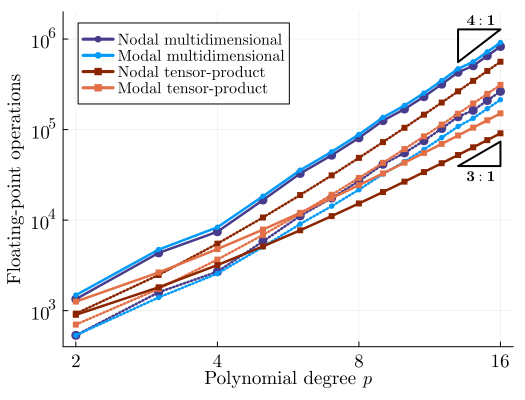

In [31]:
plt = plot(legend=:topleft, xlabel="Polynomial degree \$p\$", 
    xscale=:log10, yscale=:log10, ylims=[4*10^2,2*10^6],
    ylabel="Floating-point operations", fontfamily="Computer Modern", legendfontsize=10,
    xguidefontsize=12, yguidefontsize=12, xtickfontsize=12, ytickfontsize=12,
    xticks=([2,4,8,16], string.([2,4,8,16])), size=(525,400))
plot!(plt, collect(2:16), flops_nm_phys[1:15], label="", 
    linestyle=:dot, markershape=:circle, markersize=5, linewidth=2.5, 
    markerstrokewidth=0.0, color=:slateblue4)
plot!(plt, collect(2:16), flops_mm_phys[1:15], label="", 
    linestyle=:dot,markershape=:circle, markersize=3, linewidth=2.5, 
    markerstrokewidth=0.0, color=palette(:default)[1])
plot!(plt, collect(2:16), flops_nt_phys[1:15], label="",
    linestyle=:dot, markershape=:square, markersize=3, linewidth=2.5,
    markerstrokewidth=0.0, markerstrokecolor=:orangered4, color=:orangered4)
plot!(plt, collect(2:16), flops_mt_phys[1:15], label="",
    linestyle=:dot, markershape=:square, markersize=3, linewidth=2.5, 
    markerstrokewidth=0.0, markerstrokecolor=palette(:default)[2], color=palette(:default)[2])
plot!(plt, collect(2:16), flops_nm_ref[1:15], label="Nodal multidimensional", 
    markershape=:circle, markersize=5, linewidth=2.5, markerstrokewidth=0.0, color=:slateblue4)
plot!(plt, collect(2:16), flops_mm_ref[1:15], label="Modal multidimensional",  
    markershape=:circle, markersize=3, linewidth=2.5, markerstrokewidth=0.0, color=palette(:default)[1])
plot!(plt, collect(2:16), flops_nt_ref[1:15], label="Nodal tensor-product", 
    markershape=:square, markersize=3, linewidth=2.5, markerstrokewidth=0.0, 
    markerstrokecolor=:orangered4, color=:orangered4)
plot!(plt, collect(2:16), flops_mt_ref[1:15], label="Modal tensor-product", 
    markershape=:square, markersize=3, linewidth=2.5, markerstrokewidth=0.0, 
    markerstrokecolor=palette(:default)[2], color=palette(:default)[2])
r1 = 13
r2 = 16
plot!(plt, [r1, r2, r2, r1], 18*[r1^3, r2^3, r1^3, r1^3], label=:none, 
    linewidth=2, color=:black, annotations = ([14.6], [3.05*10^4], L"\mathbf{3:1}", 10))
plot!(plt, [r1, r2, r1, r1], 19.5*[r1^4, r2^4, r2^4, r1^4], label=:none, 
    linewidth=2, color=:black, annotations = ([14.6], [1.62*10^6], L"\mathbf{4:1}", 10))

In [32]:
savefig(plt, "../plots/flops/flops_tri.pdf")

"/Users/tristanmontoya/Research/ReproduceSBPSimplex/plots/flops/flops_tri.pdf"